<a href="https://colab.research.google.com/github/FabianoMahler/hello-world/blob/master/VIGITEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install dfply ## instala o pacote DFPLY
!pip install scikit-plot ## instala o pacote SCIKIT-PLOT
!pip install xgboost
!pip install graphviz
##!pip install python-graphviz

!pip install dtreeviz
!pip install pandas-profiling

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

### biblioteca SCIKIT-LEARN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


import random

from dfply import *

import scikitplot as skplt

from dtreeviz.trees import *

import pandas_profiling


import warnings
warnings.filterwarnings("ignore")

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
base = pd.read_csv('gdrive/My Drive/VIGITEL.csv')

In [12]:
base.head()

,chave,replica,ano,mesfim,cidade,regiao,q6,q7,civil,q8a,q8b,q8_anos,r128a,q9,q11,q14,q15,q15a,q16,q16a,q17,q18,q19,q20,q21,q23,q25,q26,q27,q28,q28a,q29,q29a,q30a,q31a,r143a,r171,r172,r173,r144a,...,ativo_livre,atitrans,atidom,atiocu,inativo,q51medio,q54medio,deslocdia,deslocsemana,atiocusemana,faxinasemana,af3dominios,af3dominios_insu,tv_d_3,tempo_tela_stv,q59a_horas,q59c_horas,tempo_tela_total,alcabu,direcao,direcao_alc,saruim,iddmamo,mamo,mamodois,iddpapa_old,iddpapa,papa,papatres,hart,diab,has,ind_med_has,med_has,trat_med_has,db,ind_med_db,med_db,insulina,trat_med_db
0,84372566033,5,2017,4,c05,1,87,2,4,8,NaN,0,2,66,777,NaN,1,1.0,1,1.0,1.0,1.0,1.0,1.0,1,1,1,3.0,1,1.0,1.0,6,NaN,NaN,NaN,1,2,2,2,6,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,240.0,0,1,0,0,0.0,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
1,83371046036,21,2017,9,c05,1,80,1,2,8,NaN,0,2,75,195,NaN,3,1.0,5,2.0,NaN,NaN,NaN,NaN,4,2,1,1.0,5,NaN,2.0,1,2.0,NaN,NaN,2,2,2,2,6,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,3.5,0.0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,1,1,1,0,0,0,0,0
2,25376446032,19,2017,9,c05,1,90,1,2,1,2.0,2,2,777,777,NaN,4,2.0,4,1.0,4.0,3.0,4.0,1.0,4,1,5,NaN,1,1.0,2.0,5,2.0,NaN,NaN,2,2,2,2,5,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,2.5,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
3,8370606035,20,2017,9,c05,1,74,2,4,1,2.0,2,2,64,160,NaN,4,1.0,4,1.0,4.0,1.0,4.0,1.0,1,3,1,1.0,4,1.0,1.0,5,1.0,1.0,1.0,2,2,2,2,6,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,2.5,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
4,21370426031,12,2017,11,c05,1,73,2,2,8,NaN,0,2,60,120,NaN,4,2.0,3,2.0,5.0,NaN,5.0,NaN,4,4,5,NaN,4,2.0,1.0,1,2.0,NaN,NaN,2,2,2,2,6,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,840.0,0,1,1,0,6.0,0.0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0


In [13]:
base.shape

(2032, 198)

In [0]:
# profiling = pandas_profiling.ProfileReport(df)
# profiling

In [0]:
# função select para congregar apenas as variáveis preditoras e a de interesse.
# rename para alterar o label das colunas. Criação de um novo dataframe "diabetes"
diabetes = (base >> select(X.q6, X.q7, X.q75, X.q76, X.q9, X.q11) >>
            rename(IDADE = X.q6, SEXO = X.q7, PESO = X.q9, ALTURA = X.q11, HIPERTENSÃO = X.q75, DIABETES = X.q76) >> 
            mask(X.PESO < 700, X.ALTURA < 700)
           )

In [16]:
diabetes.head(10)

,IDADE,SEXO,HIPERTENSÃO,DIABETES,PESO,ALTURA
1,80,1,1,2,75,195
3,74,2,2,2,64,160
4,73,2,2,2,60,120
5,49,2,2,2,95,155
6,55,2,2,2,53,150
7,65,2,2,2,62,156
8,49,2,1,2,58,160
9,77,2,2,2,73,163
10,81,2,2,2,73,165
11,76,2,1,1,65,152


In [0]:
diabetes = pd.get_dummies(diabetes, columns=['SEXO'])

In [18]:
diabetes.head(10)

,IDADE,HIPERTENSÃO,DIABETES,PESO,ALTURA,SEXO_1,SEXO_2
1,80,1,2,75,195,1,0
3,74,2,2,64,160,0,1
4,73,2,2,60,120,0,1
5,49,2,2,95,155,0,1
6,55,2,2,53,150,0,1
7,65,2,2,62,156,0,1
8,49,1,2,58,160,0,1
9,77,2,2,73,163,0,1
10,81,2,2,73,165,0,1
11,76,1,1,65,152,0,1


In [0]:
diabetes = pd.get_dummies(diabetes, columns=['DIABETES'])

In [20]:
diabetes.head(10)

,IDADE,HIPERTENSÃO,PESO,ALTURA,SEXO_1,SEXO_2,DIABETES_1,DIABETES_2,DIABETES_777
1,80,1,75,195,1,0,0,1,0
3,74,2,64,160,0,1,0,1,0
4,73,2,60,120,0,1,0,1,0
5,49,2,95,155,0,1,0,1,0
6,55,2,53,150,0,1,0,1,0
7,65,2,62,156,0,1,0,1,0
8,49,1,58,160,0,1,0,1,0
9,77,2,73,163,0,1,0,1,0
10,81,2,73,165,0,1,0,1,0
11,76,1,65,152,0,1,1,0,0


In [0]:
diabetes = pd.get_dummies(diabetes, columns=['HIPERTENSÃO'])

In [22]:
diabetes.head(10)

,IDADE,PESO,ALTURA,SEXO_1,SEXO_2,DIABETES_1,DIABETES_2,DIABETES_777,HIPERTENSÃO_1,HIPERTENSÃO_2,HIPERTENSÃO_777
1,80,75,195,1,0,0,1,0,1,0,0
3,74,64,160,0,1,0,1,0,0,1,0
4,73,60,120,0,1,0,1,0,0,1,0
5,49,95,155,0,1,0,1,0,0,1,0
6,55,53,150,0,1,0,1,0,0,1,0
7,65,62,156,0,1,0,1,0,0,1,0
8,49,58,160,0,1,0,1,0,1,0,0
9,77,73,163,0,1,0,1,0,0,1,0
10,81,73,165,0,1,0,1,0,0,1,0
11,76,65,152,0,1,1,0,0,1,0,0


In [56]:
diabetes >> drop(X.DIABETES_2, X.DIABETES_777)


AttributeError: ignored

In [24]:
diabetes >> rename(SEXO_M = X.SEXO_1, SEXO_F = X.SEXO_2, DIABETES_S = X.DIABETES_1, HIPERTENSÃO_S = X.HIPERTENSÃO_1, HIPERTENSÃO_N = X.HIPERTENSÃO_2, HIPERTENSÃO_NS = X.HIPERTENSÃO_777)


,IDADE,PESO,ALTURA,SEXO_M,SEXO_F,DIABETES_S,DIABETES_2,DIABETES_777,HIPERTENSÃO_S,HIPERTENSÃO_N,HIPERTENSÃO_NS
1,80,75,195,1,0,0,1,0,1,0,0
3,74,64,160,0,1,0,1,0,0,1,0
4,73,60,120,0,1,0,1,0,0,1,0
5,49,95,155,0,1,0,1,0,0,1,0
6,55,53,150,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2027,28,64,173,1,0,0,1,0,0,1,0
2028,41,90,178,1,0,0,1,0,0,1,0
2029,65,90,180,1,0,0,1,0,0,1,0
2030,66,86,170,1,0,1,0,0,1,0,0


In [0]:
dataframe = pd.DataFrame.from_records(diabetes)

In [26]:
dataframe.head(10)

,IDADE,PESO,ALTURA,SEXO_1,SEXO_2,DIABETES_1,DIABETES_2,DIABETES_777,HIPERTENSÃO_1,HIPERTENSÃO_2,HIPERTENSÃO_777
0,80,75,195,1,0,0,1,0,1,0,0
1,74,64,160,0,1,0,1,0,0,1,0
2,73,60,120,0,1,0,1,0,0,1,0
3,49,95,155,0,1,0,1,0,0,1,0
4,55,53,150,0,1,0,1,0,0,1,0
5,65,62,156,0,1,0,1,0,0,1,0
6,49,58,160,0,1,0,1,0,1,0,0
7,77,73,163,0,1,0,1,0,0,1,0
8,81,73,165,0,1,0,1,0,0,1,0
9,76,65,152,0,1,1,0,0,1,0,0


In [0]:
variaveis_preditoras = diabetes.iloc[:, diabetes.columns != 'DIABETES_1']
classe = diabetes.iloc[:, diabetes.columns == 'DIABETES_1']
X_train, X_test, y_train, y_test = train_test_split(variaveis_preditoras, 
                                                    classe,
                                                    train_size = 0.70,
                                                    random_state = 42)

In [0]:
X_train_columns = X_train.columns

In [0]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

(array([1104.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         172.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

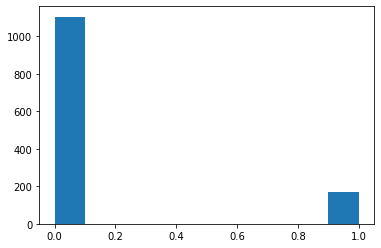

In [30]:
plt.hist(y_train)

(array([470.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  77.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

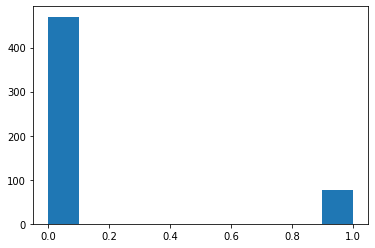

In [31]:
plt.hist(y_test)

In [0]:
from sklearn.compose import ColumnTransformer

### variáveis contínuas que serão padronizadas
continuous_cols = ['IDADE', 'ALTURA']


def setScaler():
  ct = ColumnTransformer([
        ('scaler', StandardScaler(), continuous_cols)
    ], remainder='passthrough'
  )
  return ct
  
scaler = setScaler()

In [33]:
scaler.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['IDADE', 'ALTURA'])],
                  verbose=False)

In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [36]:
pd.DataFrame(X_train, columns=X_train_columns).head(10)

,IDADE,PESO,ALTURA,SEXO_1,SEXO_2,DIABETES_2,DIABETES_777,HIPERTENSÃO_1,HIPERTENSÃO_2,HIPERTENSÃO_777
0,0.597364,0.596995,69.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,-0.487223,-0.538736,65.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.311946,-0.435488,51.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.369030,0.287250,86.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.768615,-0.848481,60.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.996949,-0.228991,73.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.597364,0.390499,65.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,1.111116,-0.435488,75.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,1.796119,-0.435488,41.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
9,1.054033,-1.467971,40.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [37]:
profile = pandas_profiling.ProfileReport(dataframe)
profile

Number of variables,11
Number of observations,1823
Total Missing (%),0.0%
Total size in memory,57.1 KiB
Average record size in memory,32.1 B
Numeric,3
Categorical,0
Boolean,8
Date,0
Text (Unique),0
Rejected,0


In [0]:
def runModel(model, X_train, y_train, X_test, y_test, confusion_matrix=True, normalizeCM=False, roc=True, plot_calibration=True, random_state=42, title="", pos_label=1):
    """Função auxiliar para execução de modelos de classificação.
    
    Parâmetros:
    
    - model: modelo de classificação a ser executado
    - X_train: base de treinamento das variáveis preditoras
    - y_train: base de treinamento da classe
    - X_test: base de teste das variáveis preditoras
    - y_test: base de teste da classe
    - confusion_matrix (default: True): exibir a matriz de confusão da classificação
    - normalizeCM (default: False): define se a matriz de confusão será normalizada
    - roc (default: True): define se será exibida a curva ROC para o classificador
    - plot_calibration (default: True): define se será exibida a curva de calibração para o classificador
    - title: define o título a ser exibido nos gráficos
    - pos_label: indica qual o valor de y_train e y_test que representa a classe positiva. O valor default é 1. 

    """
    clf = model
    name = title
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
        
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    if confusion_matrix:
       skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=normalizeCM, title=name)
    if roc:
       skplt.metrics.plot_roc(y_test, prob_pos, plot_micro=False, plot_macro=False, classes_to_plot=[1], title=name,figsize=(10,10))
     
            
    prob_pos = prob_pos[:,1]
    clf_score = brier_score_loss(y_test, prob_pos, pos_label=pos_label)
    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
        
    if plot_calibration:
      
      fraction_of_positives, mean_predicted_value = \
                calibration_curve(y_test, prob_pos, n_bins=10)
      plt.rcParams.update({'font.size': 22})
      plt.rc('legend',**{'fontsize':22})
      fig = plt.figure(3, figsize=(10, 10))
      ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
      ax2 = plt.subplot2grid((3, 1), (2, 0))
      ax1.plot([0, 1], [0, 1], "k:", label="Perfeitamente calibrado",)
      ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                     label="%s (%1.3f)" % (name, clf_score))

      ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                     histtype="step", lw=2)

      ax1.set_ylabel("Fração de positivos")
      ax1.set_ylim([-0.05, 1.05])
      ax1.legend(loc="lower right")
      ax1.set_title('Gráfico de Calibração  (reliability curve)')
      
      ax2.set_xlabel("Valor médio predito")
      ax2.set_ylabel("Quantidade")
      ax2.legend(loc="upper center", ncol=2)
      
      for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(22)
        
      for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(22)
      
      plt.tight_layout()
      plt.show()
    
    
    

In [0]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [40]:
help(runModel)

Help on function runModel in module __main__:

runModel(model, X_train, y_train, X_test, y_test, confusion_matrix=True, normalizeCM=False, roc=True, plot_calibration=True, random_state=42, title='', pos_label=1)
    Função auxiliar para execução de modelos de classificação.
    
    Parâmetros:
    
    - model: modelo de classificação a ser executado
    - X_train: base de treinamento das variáveis preditoras
    - y_train: base de treinamento da classe
    - X_test: base de teste das variáveis preditoras
    - y_test: base de teste da classe
    - confusion_matrix (default: True): exibir a matriz de confusão da classificação
    - normalizeCM (default: False): define se a matriz de confusão será normalizada
    - roc (default: True): define se será exibida a curva ROC para o classificador
    - plot_calibration (default: True): define se será exibida a curva de calibração para o classificador
    - title: define o título a ser exibido nos gráficos
    - pos_label: indica qual o valor

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

Regressão Logística:
	Brier: 0.001
	Precision: 0.987
	Recall: 1.000
	F1: 0.994



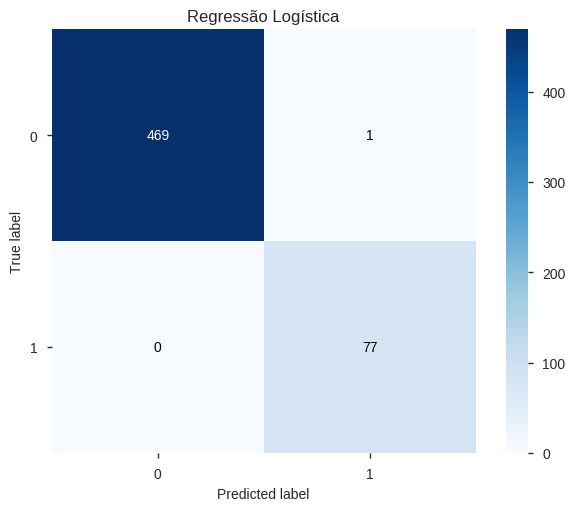

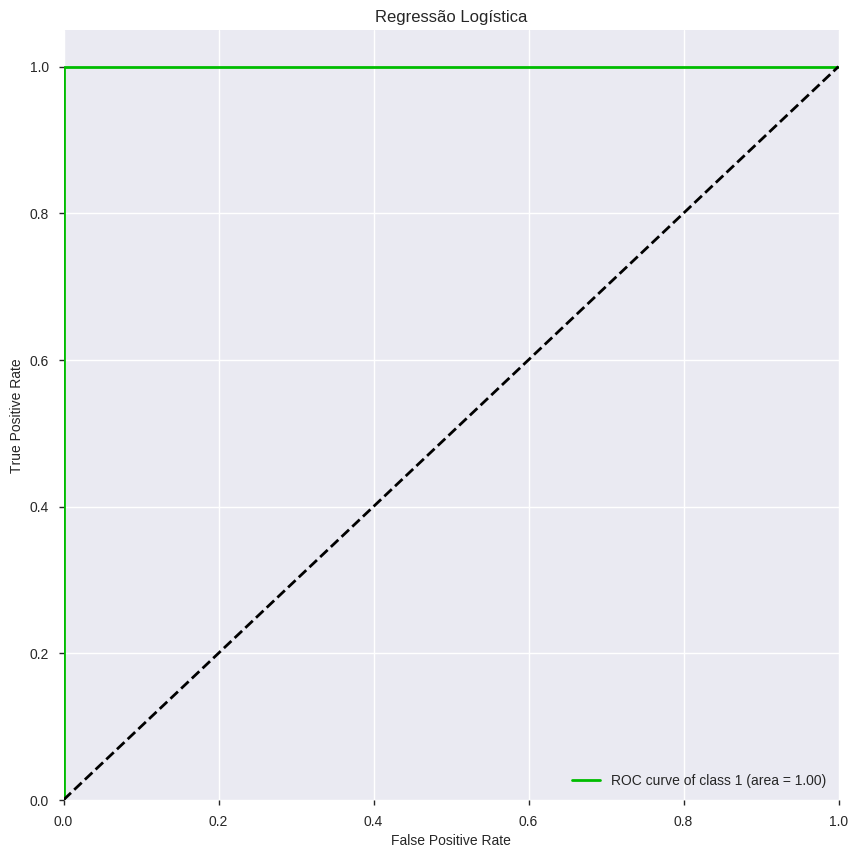

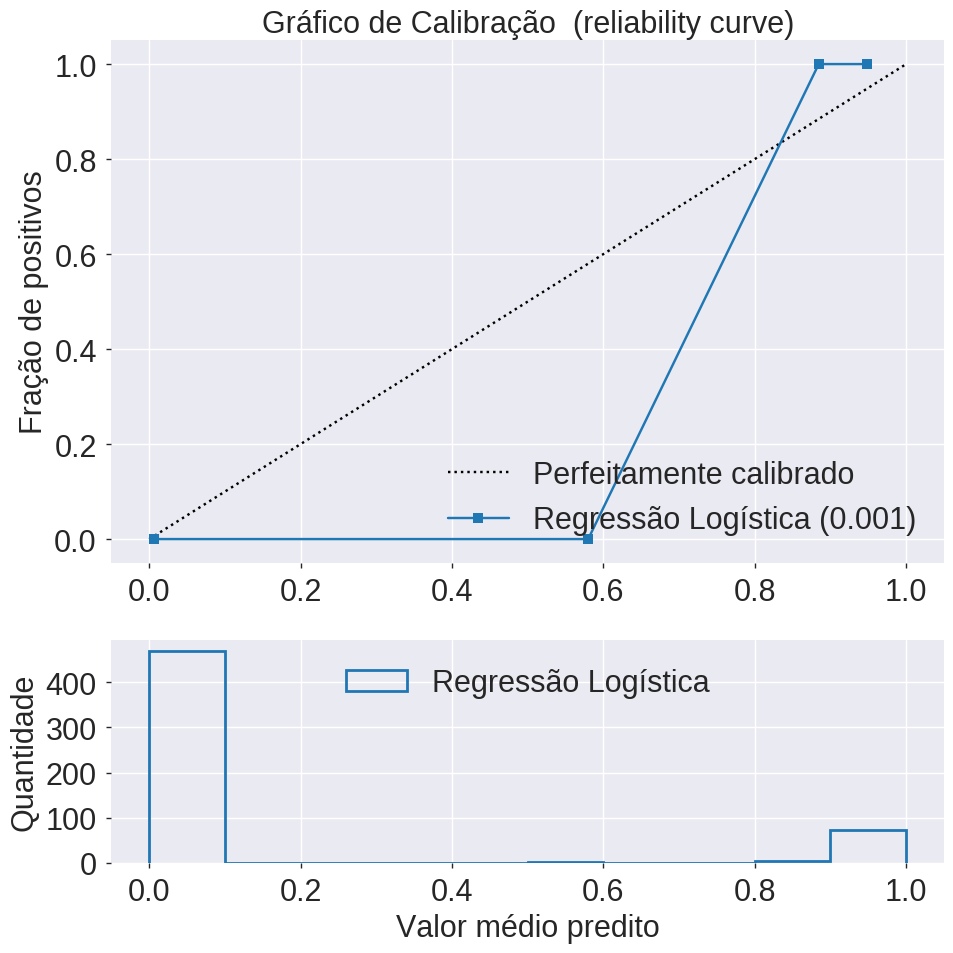

In [43]:
runModel(lr, X_train, y_train, X_test, y_test, title="Regressão Logística")

In [0]:
# criando a random forest

fit_rf = RandomForestClassifier(random_state=42, verbose=1)



In [0]:
np.random.seed(42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

### Caso deseje rodar GridSearchCV, troque a linha acima pela que segue

cv_rf = GridSearchCV(fit_rf, cv=3, param_grid=param_grid,
                     n_jobs = -1) 

cv_rf = RandomizedSearchCV(fit_rf, n_iter=50, cv=3, verbose=1, param_distributions=param_grid,
                     n_jobs = -1)



In [46]:
cv_rf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rf = cv_rf.best_estimator_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Random Forest:
	Brier: 0.004
	Precision: 0.987
	Recall: 1.000
	F1: 0.994



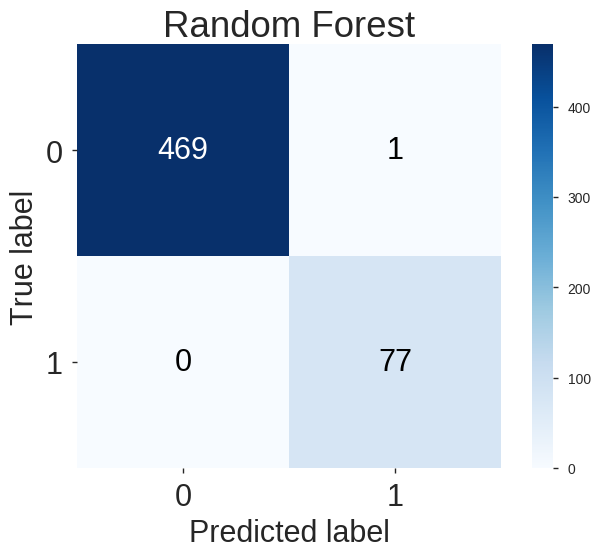

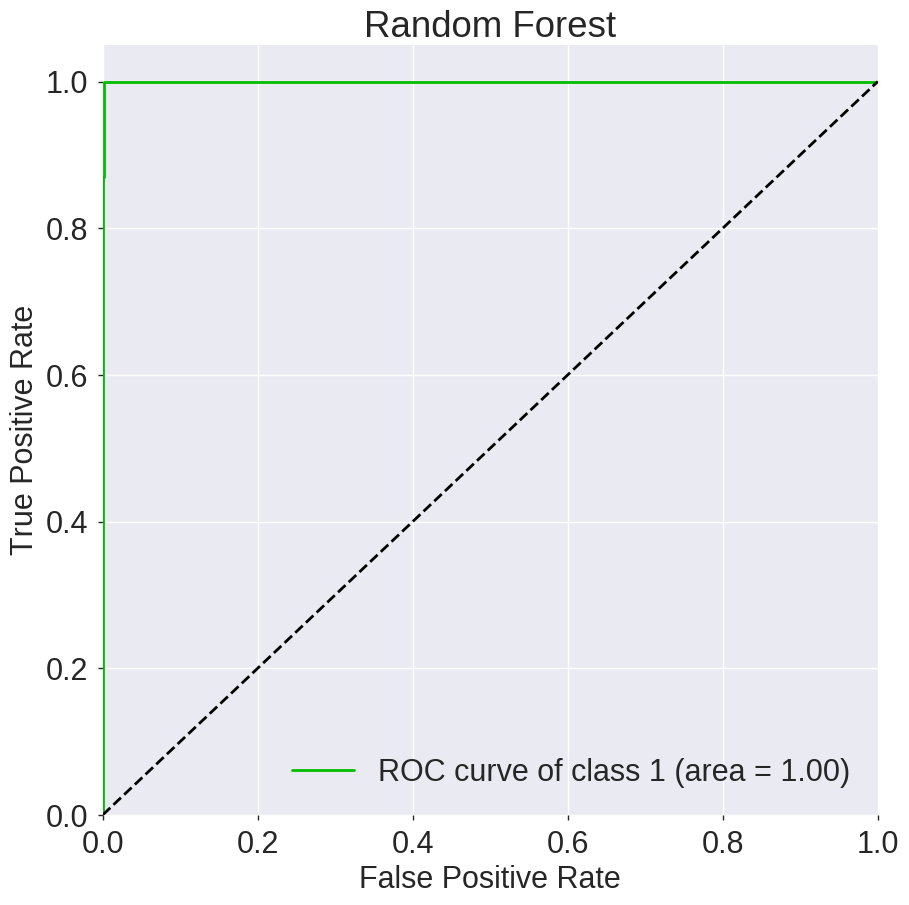

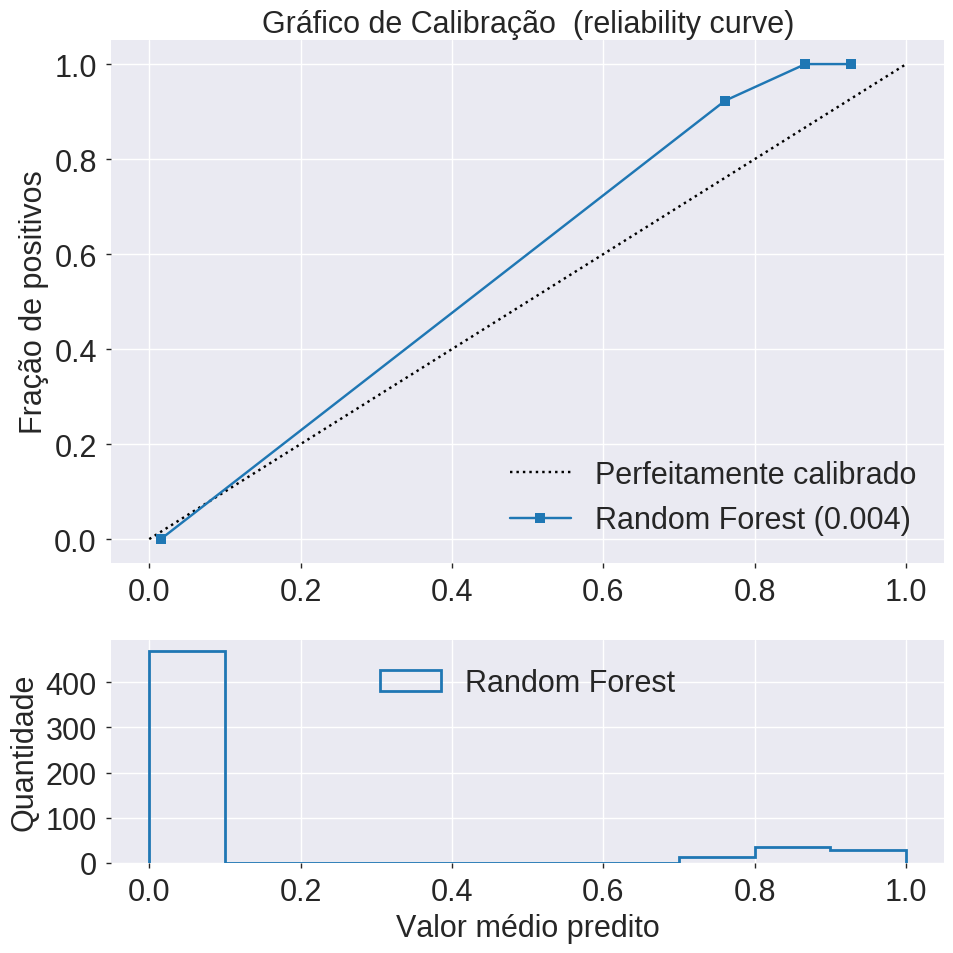

In [48]:
runModel(rf, X_train, y_train, X_test, y_test, title="Random Forest")